# Ev.7:- Customer Churn Analysis

In [1]:
# For importing Libraries used for model building:-
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the csv file.
data=pd.read_csv("Telecom_customer_churn.csv")

In [3]:
# .head used for fetching first five rows:-
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EXPLORATORY DATA ANALYSIS (EDA):-

In [4]:
# For checking how many rows and columns are there in dataset:-
data.shape

(7043, 21)

In this, there are 7043 rows and 21 columns present in the dataset.

In [5]:
# For checking the number of unique values :-
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Here, customer ID column has all the unique values in it, so it should be dropped to maintain model accuracy.

In [6]:
# For seeing the available columns in the dataset:-
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Here, the columns in this dataset are listed above.

In [7]:
# For checking the datatypes of all the columns present in the dataset:-
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Here, there are 18 object datatype columns,2 float datatype columns and only 1 with integer as datatype.
Here, Churn has object datatype and it is the Target Column of this dataset.Hence, it is a classification problem.

In [8]:
# For dropping the column customer ID:-
data=data.drop(["customerID"],axis=1)

In [9]:
# For checking column has been dropped or not?
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Here, as seen above the column has been removed.

In [10]:
# For changing the datatype of column TotalCharges as it is having object dtype but having numeric data in it:-
data["TotalCharges"]=data["TotalCharges"].str.strip()
data["TotalCharges"]=pd.to_numeric(data["TotalCharges"])

In [11]:
# For checking information of the dataset:-
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Here, as seen above the datatype of TotalCharges has been changed to float64.

In [13]:
# For checking the Null values present in the dataset:-
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Here, there are 11 Null values present in TotalCharges column.

In [14]:
# For filling NaN values in column Total Charges:-
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [15]:
data['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [16]:
# For checking the value counts in all the columns of the dataset:-
for i in data.columns:
    print(data[i].value_counts())
    print('-------')

Male      3555
Female    3488
Name: gender, dtype: int64
-------
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
-------
No     3641
Yes    3402
Name: Partner, dtype: int64
-------
No     4933
Yes    2110
Name: Dependents, dtype: int64
-------
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
-------
Yes    6361
No      682
Name: PhoneService, dtype: int64
-------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
-------
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
-------
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
-------
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
-------
No                     3095
Yes                    2422

In [17]:
# For seperating categorical and integer columns:-
Category=[]
Integer=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        Category.append(i)
    else:
        Integer.append(i)
print(Category)
print(Integer)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [18]:
# For checking the Target Column Churn for unique values:-
data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In this, there are 2 types of values present in it.

In [19]:
# For checking whether there is any empty spaces or values present in the Target column:-
data.loc[data["Churn"]=="  "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [20]:
# For checking the statistical summary of the dataset:-
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Here, there is difference between mean and median so there is some skewness present in the dataset, 
and there is a difference between 75% and the Max which clearly shows that there are some outliers present in the dataset.

# Performing Univariate Analysis:-

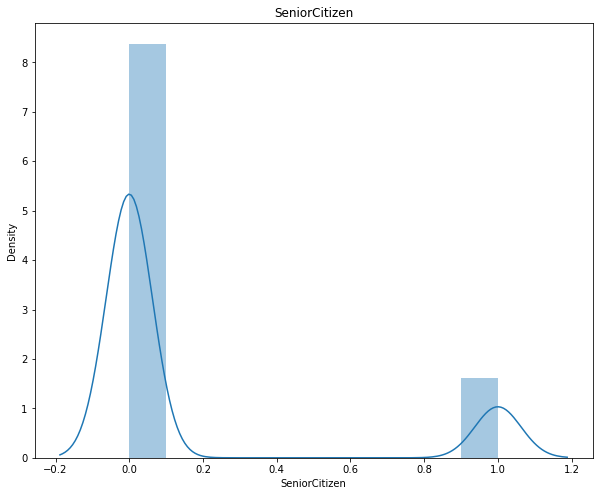

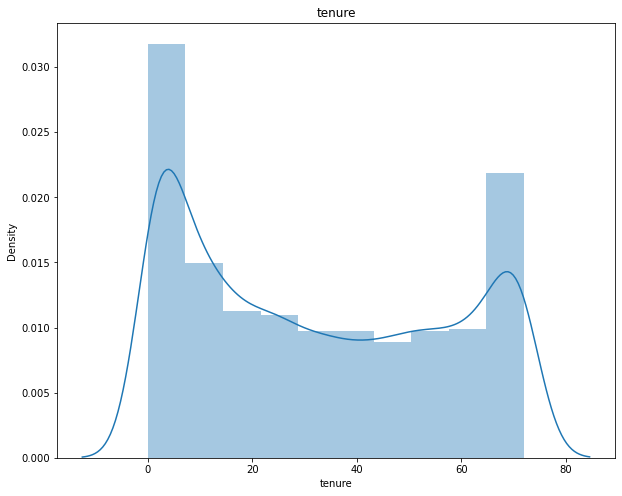

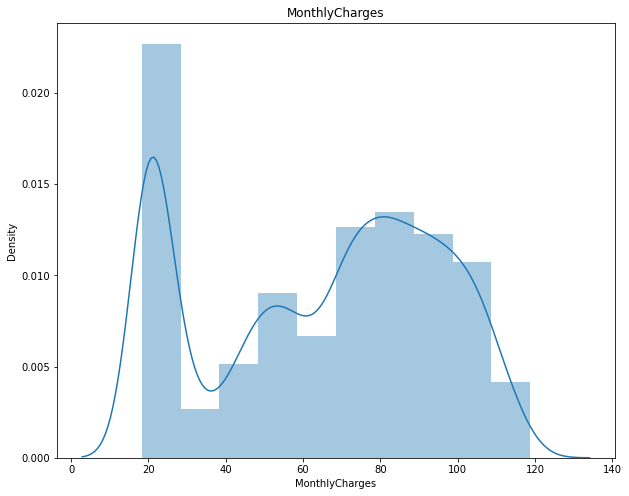

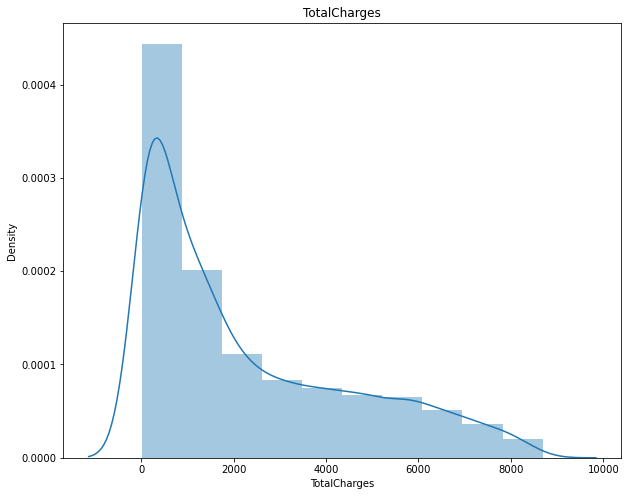

In [21]:
# For visualising all integer columns using dist plot:-
for i in data[Integer]:
    plt.figure(figsize=(10,8))
    sns.distplot(data[i],bins=10)
    plt.title(i)
    plt.show()

Here, also after visualising dist plots the skewness is clearly seen.

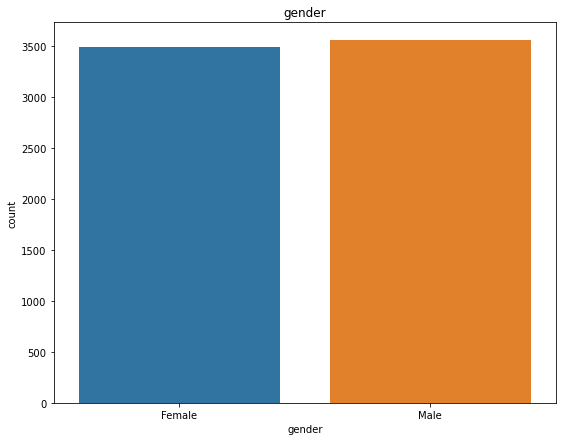

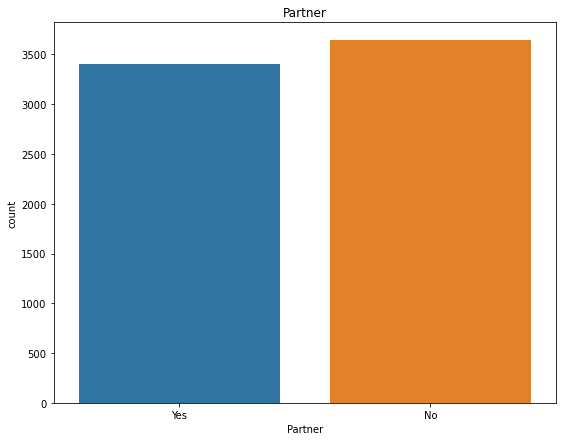

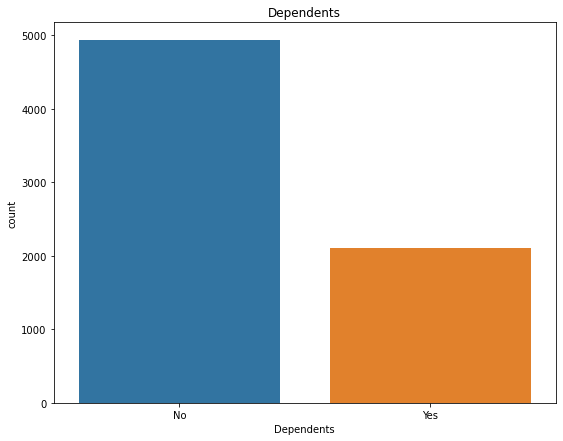

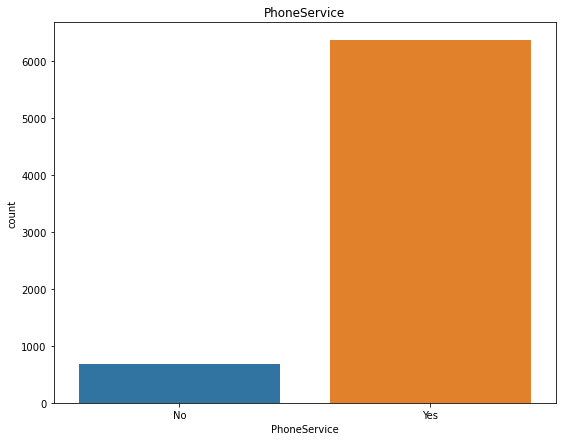

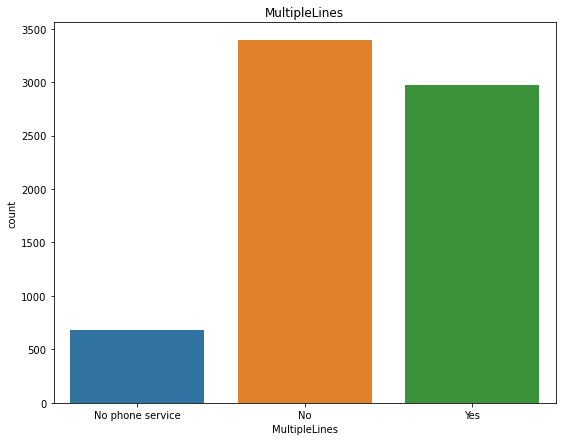

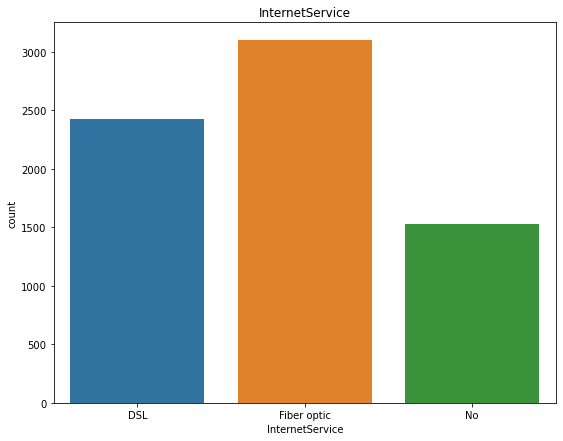

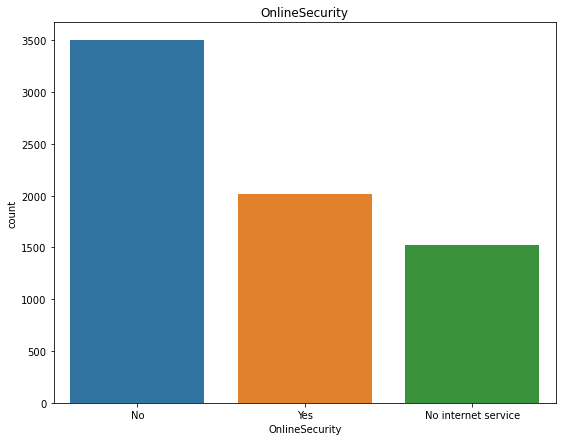

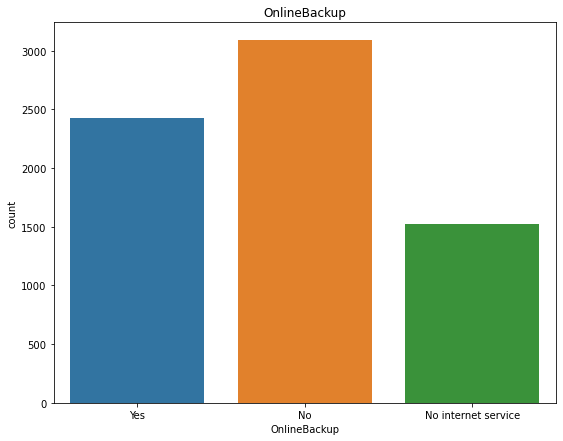

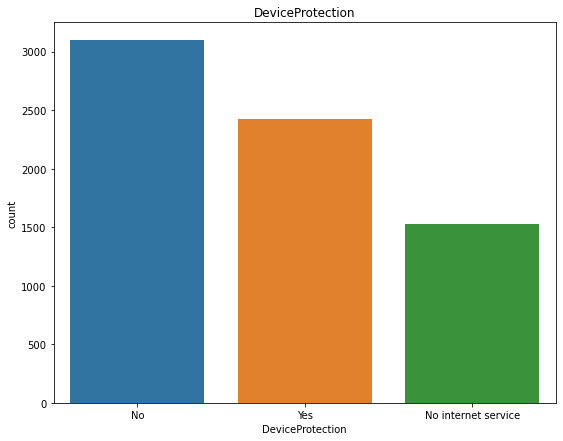

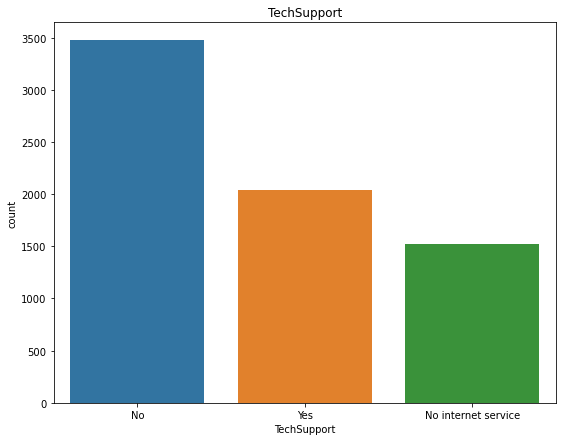

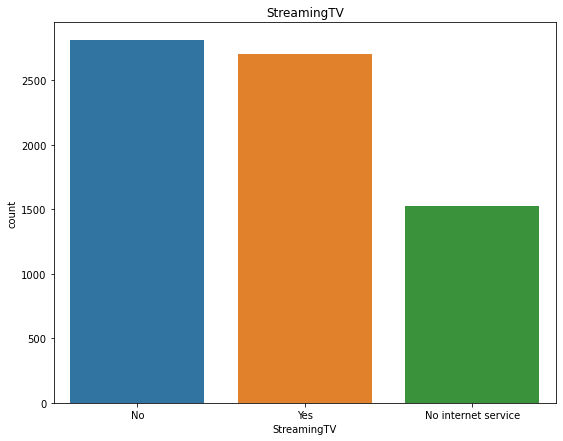

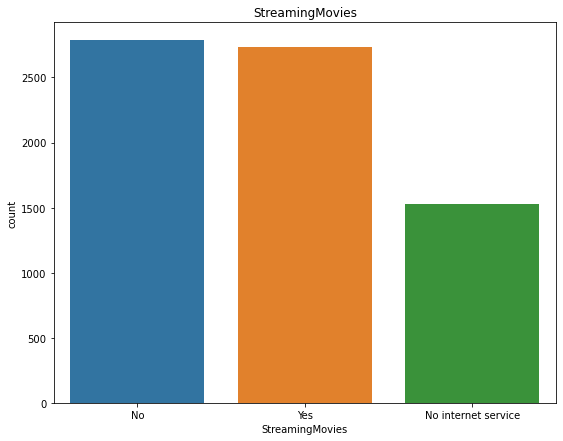

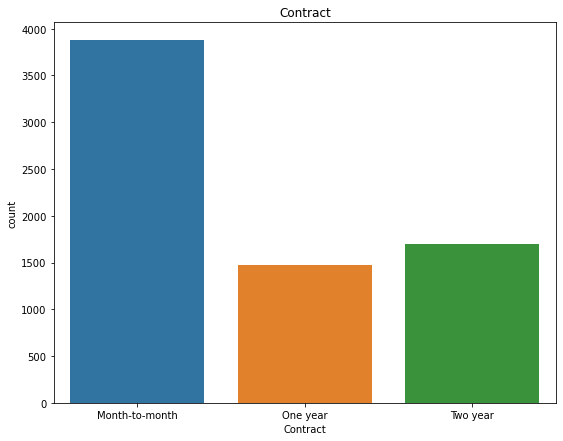

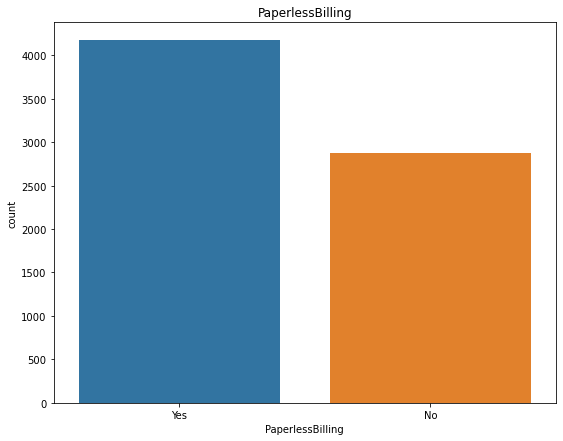

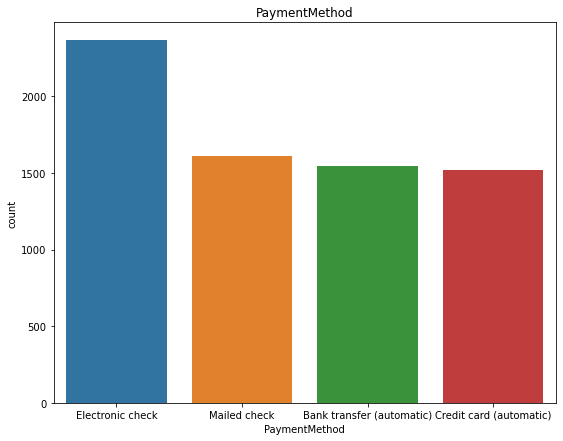

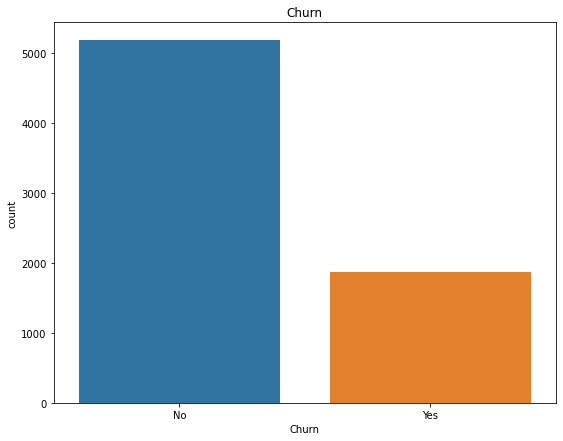

In [22]:
# For visualising all the categorical columns:-
for i in data[Category]:
    plt.figure(figsize=(9,7))
    sns.countplot(data[i])
    plt.title(i)
    plt.show()

Here it is seen that, Both the genders have similar counts, same for partner or not.

Here it is seen that most of the customers dont have dependents.

Here in phone service it is seen that most of the customers are with the phone services.

Here in multiple line column, it is seen that most customer dont have or used multiple lines.

Here in internet service column, it is seen that majority of customers use Fiber optic based Internet Service.

Here in online security majority of people dont have any kind of online security.

Here most of the people dont take online backup and same stands for Device Protection that very few people buy/use device protection.

# Bivariate Analysis:-

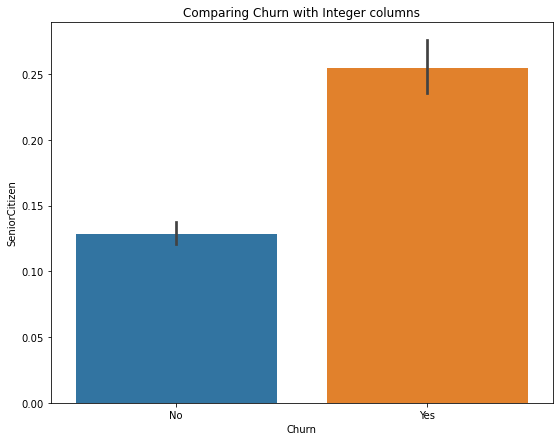

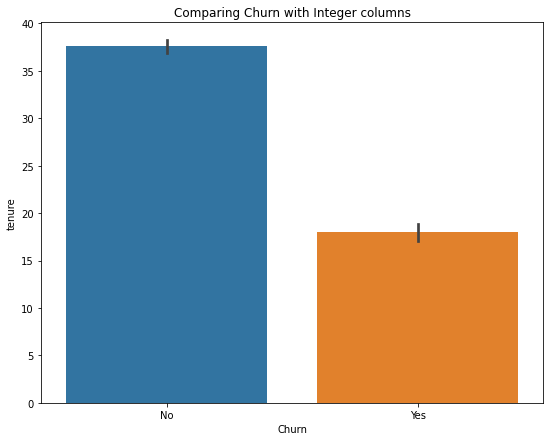

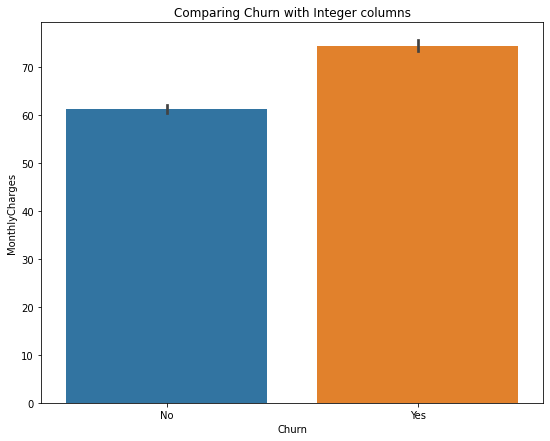

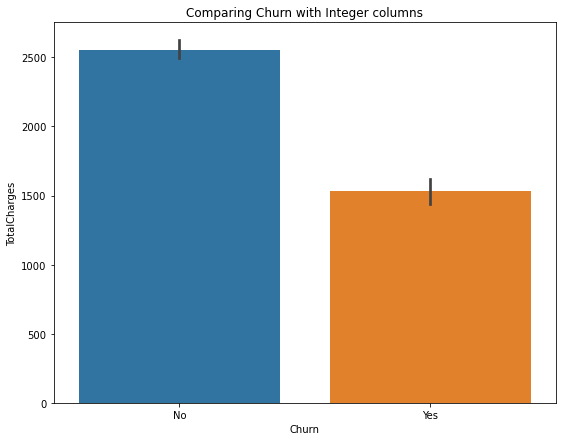

In [23]:
# For comparing churn with Integer columns:-
for i in data[Integer]:
    plt.figure(figsize=(9,7))
    sns.barplot(x="Churn",y=data[i], data=data)
    plt.title("Comparing Churn with Integer columns")
    plt.show()

Here, it is seen that if the customer or person is senior citzen then there are chances of Churn.

If Tenure is high then there are very less chances of Churn.

If Monthly Charges are High, then there are high chances of Churn.

If Total Charges are High, then there is very little chance of Churn.

In [24]:
# For comparing Churn with Categorical columns:-
cat=data[Category].drop(["Churn"],axis=1)

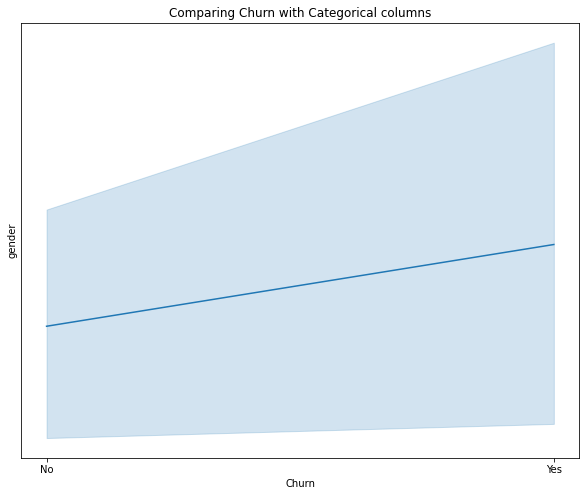

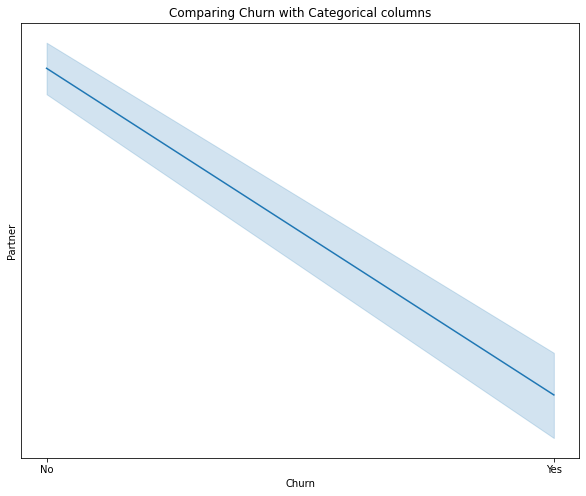

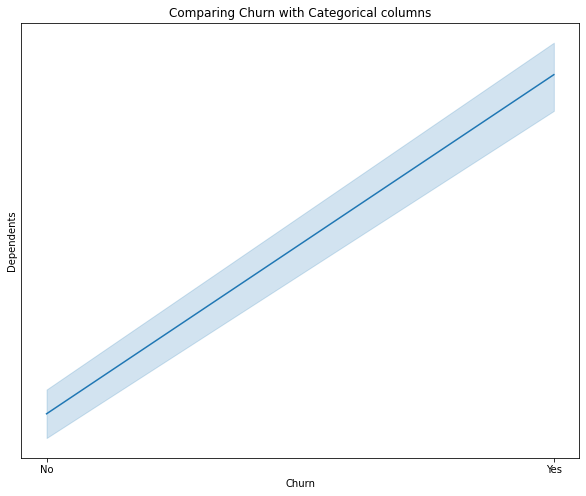

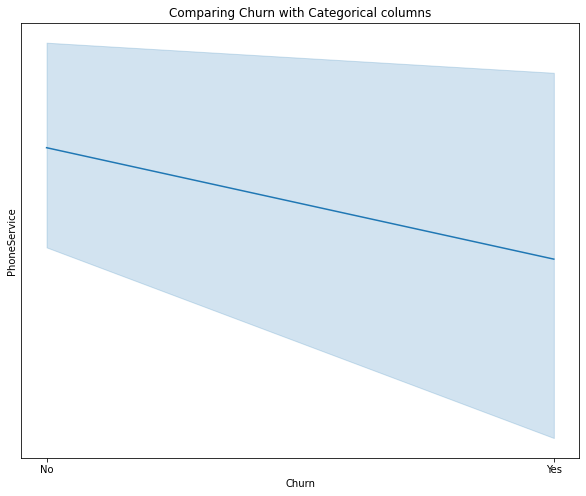

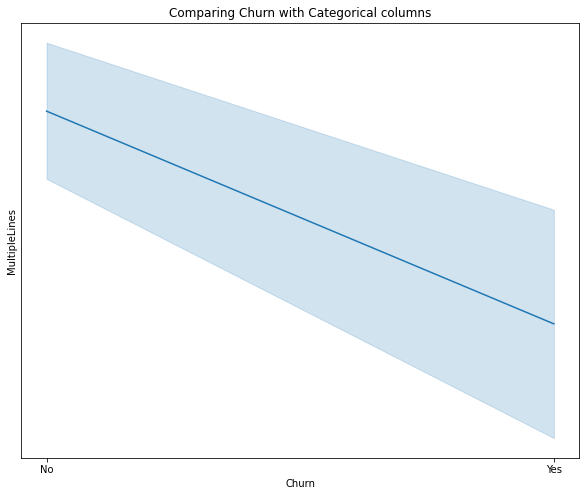

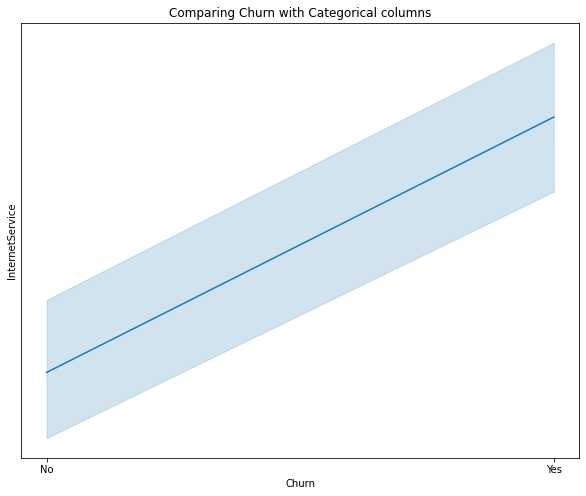

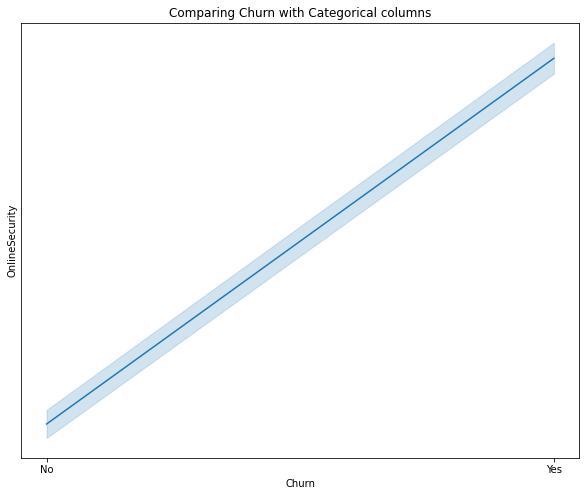

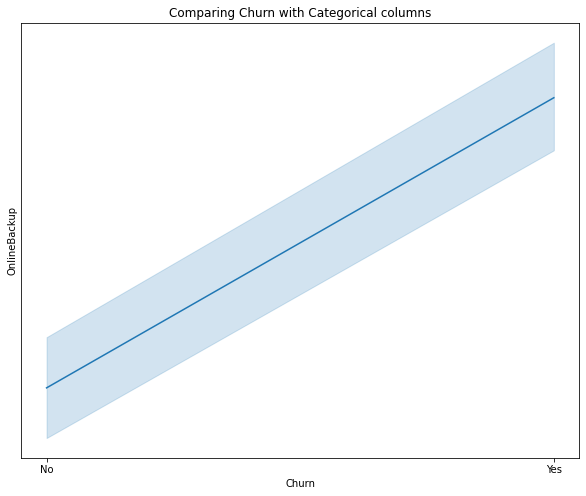

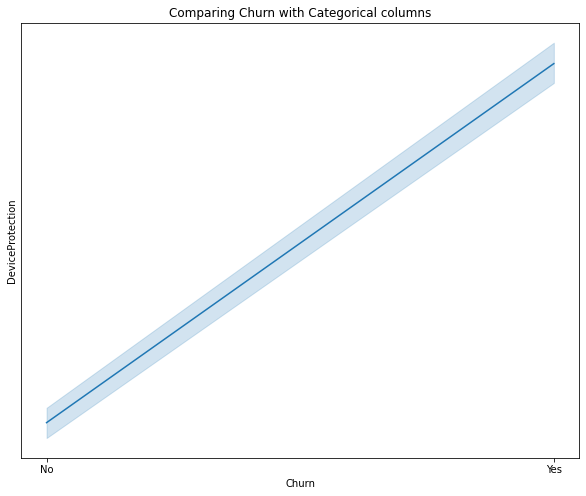

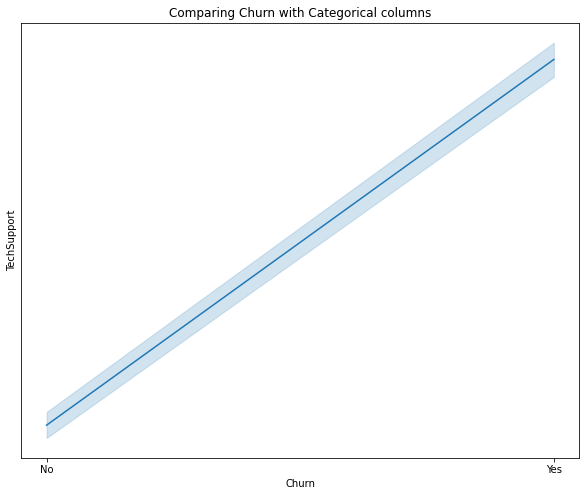

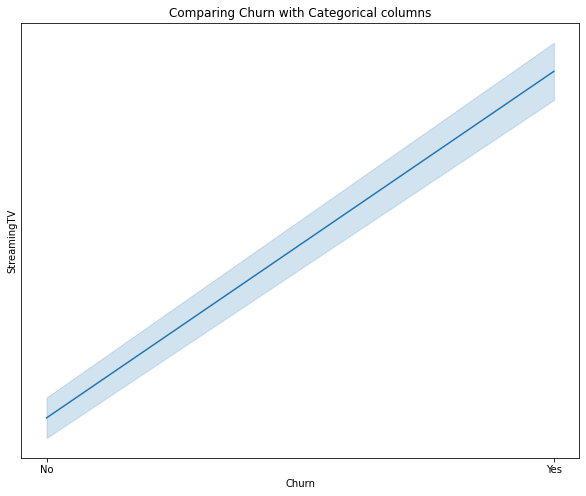

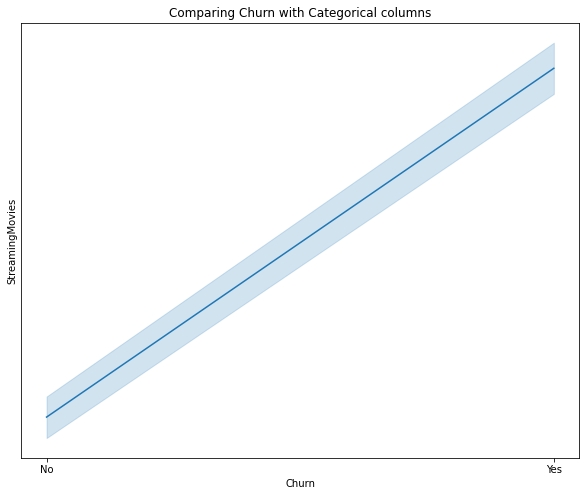

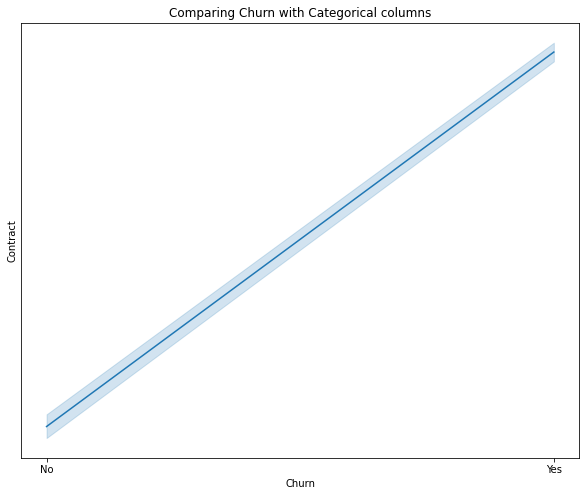

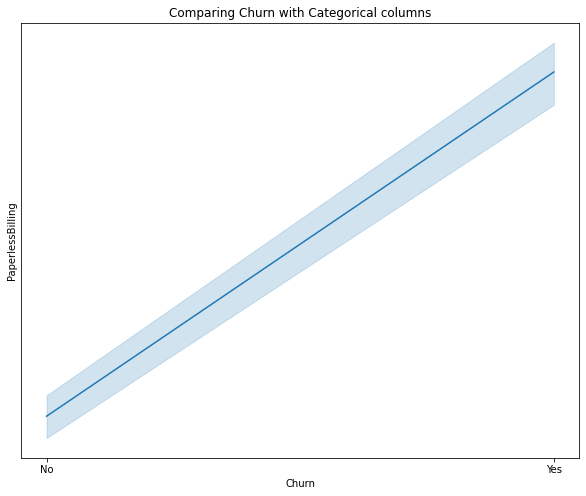

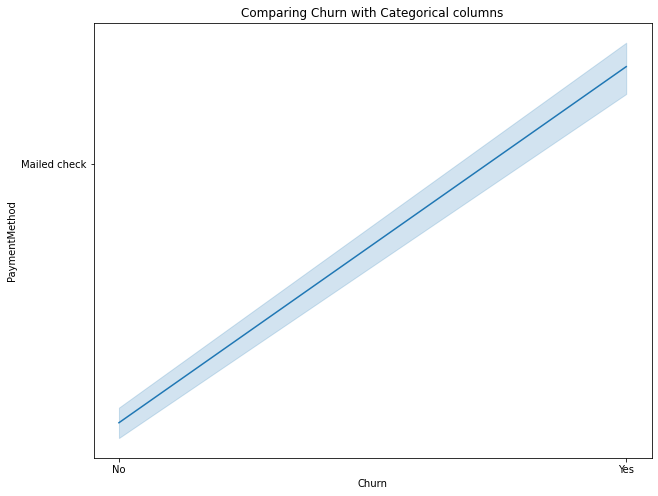

In [25]:
for i in cat:
    plt.figure(figsize=(10,8))
    sns.lineplot(x="Churn",y=data[i],data=data)
    plt.title("Comparing Churn with Categorical columns")
    plt.show()

Here,

Chances of churn is almost equal in both the Genders.

There are less chances of churn for the customers having partner.

Customers having dependents are having high chances of Churn.

Customers with no phone service are less churned as compared to customers with Phone Services.

Customers with multiple lines are small in number but customers with multiple lines are less churned.

Customers with internet service are more likely to churn.

Customers without online security are more churned.

Customers without online backup are more churned.

Customers without device protection are more likely to churn.

# Multivariate Analysis:-

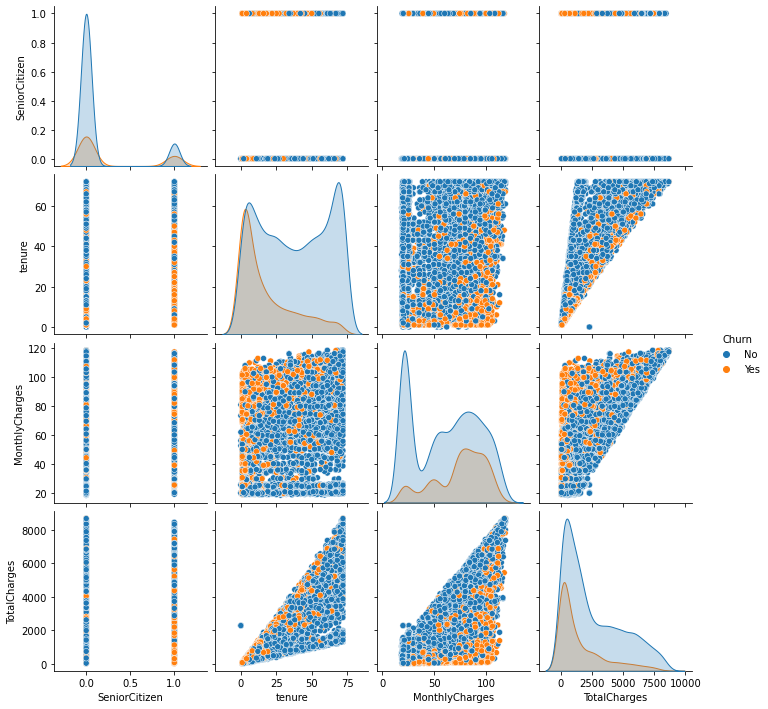

In [26]:
# For visualising and comparing all the columns present in the dataset with Churn as hue:-
sns.pairplot(data,hue="Churn")

<AxesSubplot:>

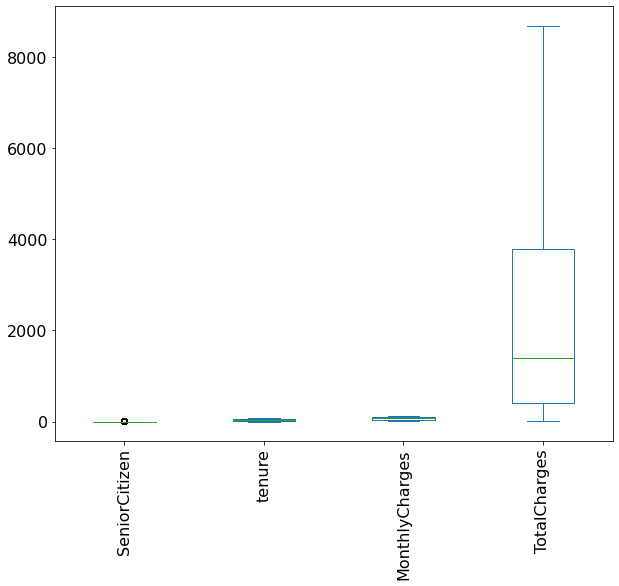

In [27]:
# For checking the presence of outliers using boxplot method:-
data.plot(rot=90,kind="box",fontsize=16,figsize=(10,8))

Here, only Seniorcitizen column is having outliers and it will not removed because it is a categorical column.

In [28]:
# For checking the skewness:-
data.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

Skewness is present in 2 columns:- Seniorcitizen and TotalCharges.

In [29]:
# For remove skewness using Yeo-Johnson method and importing required libraries:-
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')
'''
parameters:
method= 'box_cox' or'yeo-johnson'
'''

"\nparameters:\nmethod= 'box_cox' or'yeo-johnson'\n"

In [30]:
# For applying 'yeo-johnson' method :-
data[['TotalCharges']]=scaler.fit_transform(data[['TotalCharges']].values)

In [31]:
# For checking skewness after applying yeo-johnson:-
data.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges     -0.144899
dtype: float64

Here, skewness has been removed from continuos variable.

# Encoding Techniques:-

In [32]:
# For encoding all the Categorial columns using Label Encoder and importing required libraries for it:-
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data[Category]:
    data[i]=le.fit_transform(data[i].values.reshape(-1,1))
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,-1.810588,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0.253313,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,-1.387269,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0.232253,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,-1.250118,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,0.295688,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,1.567097,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,-0.859899,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,-0.922968,1


Here, data has been converted into numeric.

In [33]:
# For checking the correlation of all the columns in the dataset:-
corr=data.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.002691,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.105478,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.344618,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.087831,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.865270,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.084371,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.458682,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.207654,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.242515,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.344209,-0.195525


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 [Text(0, 0.5, 'gender'),
  Text(0, 1.5, 'SeniorCitizen'),
  Text(0, 2.5, 'Partner'),
  Text(0, 3.5, 'Dependents'),
  Text(0, 4.5, 'tenure'),
  Text(0, 5.5, 'PhoneService'),
  Text(0, 6.5, 'MultipleLines'),
  Text(0, 7.5, 'InternetService'),
  Text(0, 8.5, 'OnlineSecurity'),
  Text(0, 9.5, 'OnlineBackup'),
  Text(0, 10.5, 'DeviceProtection'),
  Text(0, 11.5, 'TechSupport'),
  Text(0, 12.5, 'StreamingTV'),
  Text(0, 13.5, 'StreamingMovies'),
  Text(0, 14.5, 'Contract'),
  Text(0, 15.5, 'PaperlessBilling'),
  Text(0, 16.5, 'PaymentMethod'),
  Text(0, 17.5, 'MonthlyCharges'),
  Text(0, 18.5, 'TotalCharges'),
  Text(0, 19.5, 'Churn')])

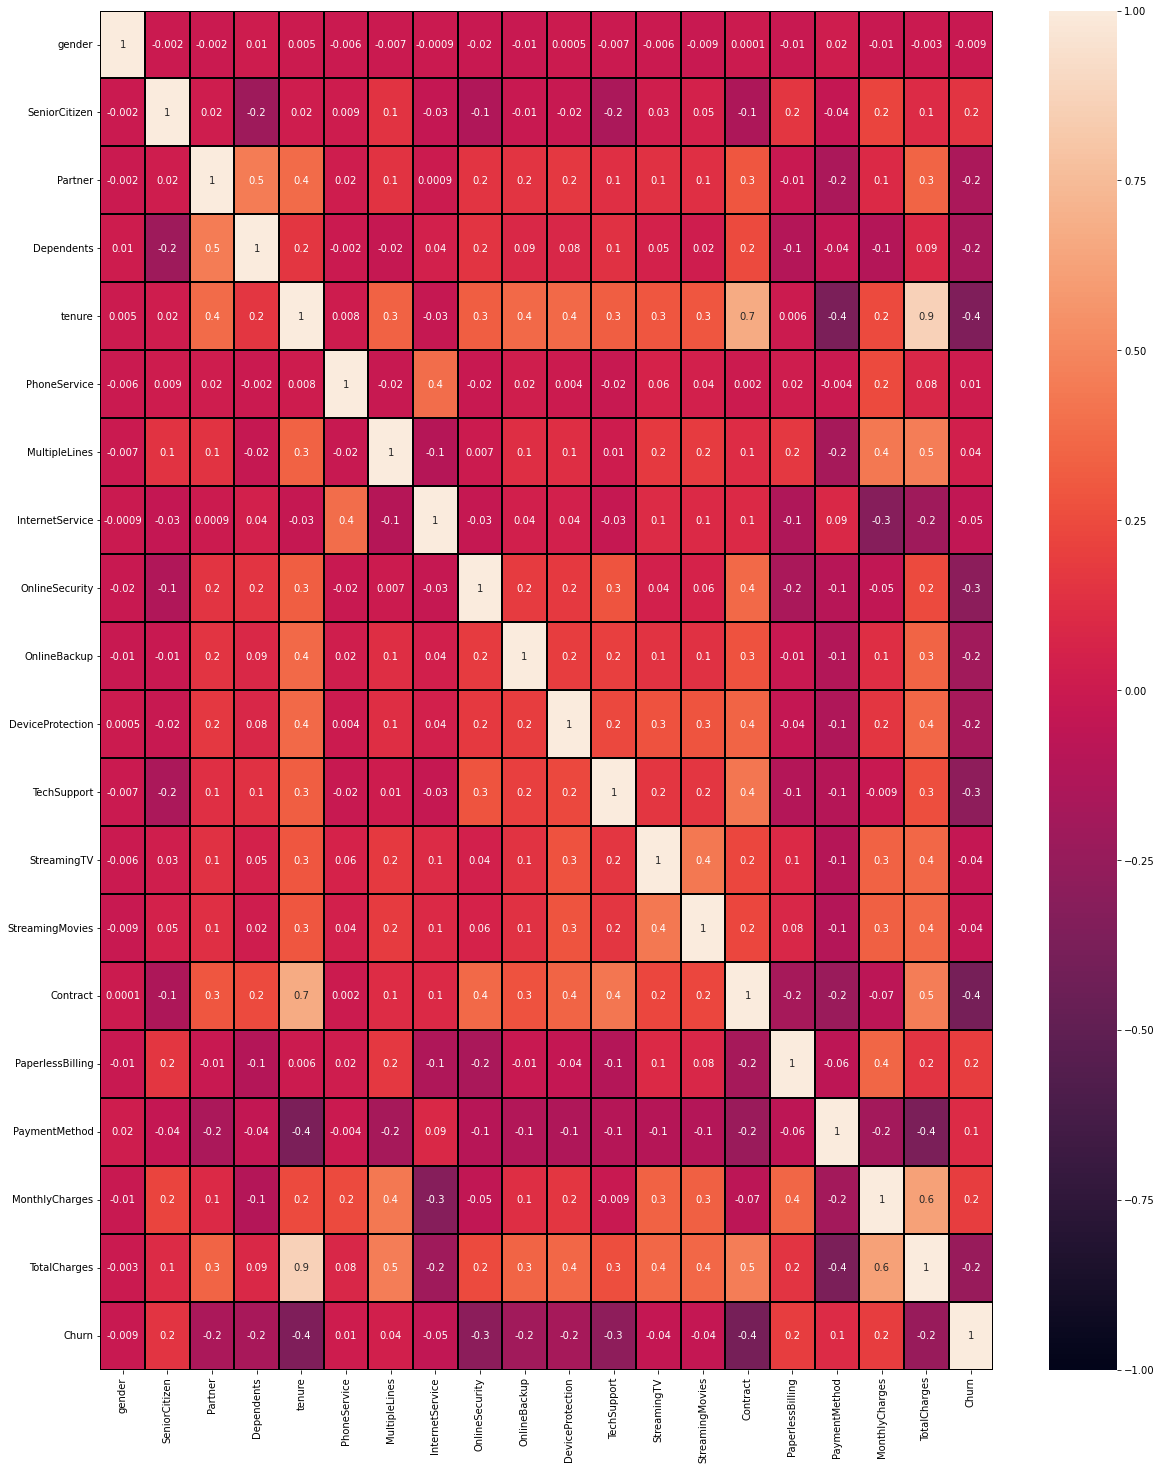

In [34]:
# For visualising above correlation using heatmap method:-
plt.figure(figsize=(20,25))
sns.heatmap(data.corr(),linewidth=.1,vmin=-1,vmax=1,fmt=".1g",annot=True, linecolor="black")
plt.yticks(rotation=0)

Here,
It is seen that multicolinearity issue between columns tenure and TotalCharges.

Tenure and Contract has a strong correlation

MonthlyCharges and TotalCharges also has very good relation.

Target column Churn shares Negative good relation with tenure and contract.

# Data Scaling:-

In [35]:
# For seperating feature and target column:-
x=data.drop('Churn',axis=1)
y=data['Churn']

In [36]:
# For scaling the data using StandardScaler and importing required libraries:-
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [37]:
# for checking the first rows of x:-
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.810588
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.253313
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.387269
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.232253
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.250118


# Multicollinearity Resolution:-

In [38]:
# For checking Multicolinearity using VIF and importing required libraries:-
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_feat"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_feat,Features
0,1.001684,gender
1,1.149730,SeniorCitizen
2,1.463075,Partner
3,1.384396,Dependents
4,10.690306,tenure
5,1.622399,PhoneService
6,1.397403,MultipleLines
7,1.866643,InternetService
8,1.252550,OnlineSecurity
9,1.188767,OnlineBackup


In [39]:
# For dropping column with Multicollinearity:-
x=x.drop(["TotalCharges"],axis=1)

In [40]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


# Data Balancing using SMOTE:-

In [41]:
# For balancing the Target variable using OverSampling and checking the value_counts of variable:-
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [42]:
# For balancing the Target variable using OverSampling and checking the value_counts of variable:-
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [43]:
# For checking the value count again after balancing:-
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

Here, the data has been balanced properly.

# Finding the Best Random State:-

In [44]:
# For importing all required libraries:-
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [45]:
# For finding best random state and accuracy score:-
Max_acc=0
Max_rs=0
for i in range(1,250):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=i )
    Model=RandomForestClassifier()
    Model.fit(x_train,y_train)
    pred=Model.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>Max_acc:
        Max_acc=acc
        Max_rs=i
print("Best accuracy is ",Max_acc,"on random_state ",Max_rs)

Best accuracy is  0.8722261989978526 on random_state  102


In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27, random_state=102)

# Classification Model Building:-

In [47]:
# For Importing all required libraries for model selection:-
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier as KNN

In [48]:
# For checking accuracy score with 1st model:-KNeighborsClassifier:-
knn=KNN()
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test,prediction))
print("Confusion Matrix: ",confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

Accuracy Score:  0.7816750178954903
Confusion Matrix:  [[ 934  473]
 [ 137 1250]]
              precision    recall  f1-score   support

           0       0.87      0.66      0.75      1407
           1       0.73      0.90      0.80      1387

    accuracy                           0.78      2794
   macro avg       0.80      0.78      0.78      2794
weighted avg       0.80      0.78      0.78      2794



In this, Knn is giving accuracy score of 79 %.

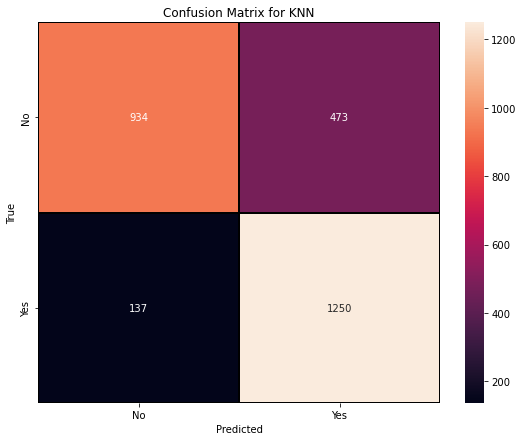

In [50]:
# For observing Confusion Matrix:-
CM=confusion_matrix(y_test,prediction)
x_axis_labels= ["No","Yes"]
y_axis_labels= ["No","Yes"]
f,ax = plt.subplots(figsize=(9,7))
sns.heatmap(CM, annot=True, linewidth=.2, linecolor="black",fmt='.0f',ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNN')
plt.show()

In [55]:
# For checking accuracy score with 2nd model:-GradientBoostingClassifier:-
Gbc=GradientBoostingClassifier()
Gbc.fit(x_train,y_train)
pred_g=Gbc.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test,pred_g))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_g))
print(classification_report(y_test,pred_e))

Accuracy Score:  0.8550465282748747
Confusion Matrix:  [[1181  226]
 [ 179 1208]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1407
           1       0.87      0.89      0.88      1387

    accuracy                           0.88      2794
   macro avg       0.88      0.88      0.88      2794
weighted avg       0.88      0.88      0.88      2794



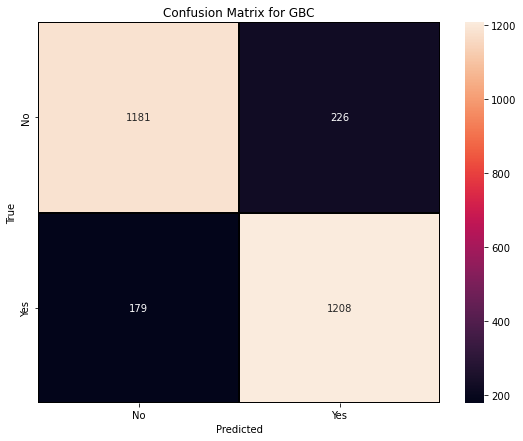

In [56]:
# For observing Confusion Matrix of above model:-
CM1=confusion_matrix(y_test,pred_g)
x_axis_labels= ["No","Yes"]
y_axis_labels= ["No","Yes"]
f,ax = plt.subplots(figsize=(9,7))
sns.heatmap(CM1, annot=True, linewidth=.2, linecolor="black",fmt='.0f',ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for GBC')
plt.show()

In [54]:
# For checking accuracy score with 3Rd model:-ExtraTreesClassifier:-
Extra=ExtraTreesClassifier()
Extra.fit(x_train,y_train)
pred_e=Extra.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test,pred_e))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_e))
print(classification_report(y_test,pred_e))

Accuracy Score:  0.8790264853256979
Confusion Matrix:  [[1223  184]
 [ 154 1233]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1407
           1       0.87      0.89      0.88      1387

    accuracy                           0.88      2794
   macro avg       0.88      0.88      0.88      2794
weighted avg       0.88      0.88      0.88      2794



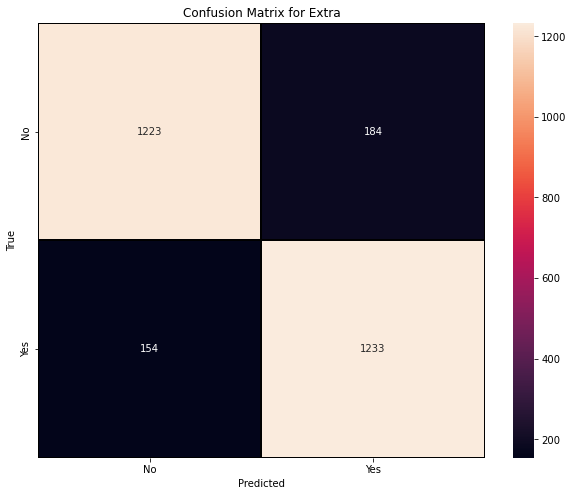

In [57]:
# For observing Confusion Matrix of above model:-
CM2=confusion_matrix(y_test,pred_e)
x_axis_labels= ["No","Yes"]
y_axis_labels= ["No","Yes"]
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(CM2, annot=True, linewidth=.2, linecolor="black",fmt='.0f',ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Extra')
plt.show()

In [58]:
# For checking accuracy score with 4th Model:-DecisionTreesClassifier:-
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred_d=DTC.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test,pred_d))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_d))
print(classification_report(y_test,pred_d))

Accuracy Score:  0.7984967788117394
Confusion Matrix:  [[1114  293]
 [ 270 1117]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1407
           1       0.79      0.81      0.80      1387

    accuracy                           0.80      2794
   macro avg       0.80      0.80      0.80      2794
weighted avg       0.80      0.80      0.80      2794



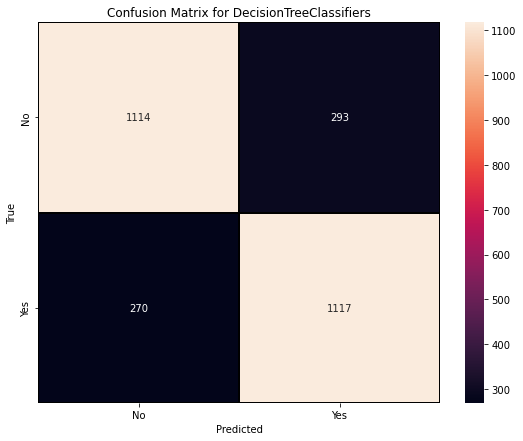

In [60]:
# For observing Confusion Matrix of above model:-
CM3=confusion_matrix(y_test,pred_d)
x_axis_labels= ["No","Yes"]
y_axis_labels= ["No","Yes"]
f,ax = plt.subplots(figsize=(9,7))
sns.heatmap(CM3, annot=True, linewidth=.2, linecolor="black",fmt='.0f',ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for DecisionTreeClassifiers')
plt.show()

In [61]:
# For checking accuracy score with 5th Model:-RandomForestClassifier:-
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_r=rfc.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test,pred_r))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_r))
print(classification_report(y_test,pred_r))

Accuracy Score:  0.8700787401574803
Confusion Matrix:  [[1218  189]
 [ 174 1213]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1407
           1       0.87      0.87      0.87      1387

    accuracy                           0.87      2794
   macro avg       0.87      0.87      0.87      2794
weighted avg       0.87      0.87      0.87      2794



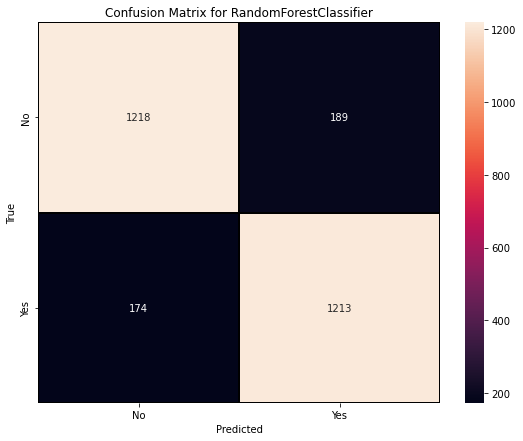

In [62]:
# For observing Confusion Matrix of above model:-
CM4=confusion_matrix(y_test,pred_r)
x_axis_labels= ["No","Yes"]
y_axis_labels= ["No","Yes"]
f,ax = plt.subplots(figsize=(9,7))
sns.heatmap(CM4, annot=True, linewidth=.2, linecolor="black",fmt='.0f',ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [64]:
# For checking accuracy score with another method SupportVectorClassifier:
sv=SVC()
sv.fit(x_train,y_train)
pred_sv=sv.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,pred_sv))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_sv))
print(classification_report(y_test,pred_sv))

Accuracy score:  0.8178239083750894
Confusion Matrix:  [[1105  302]
 [ 207 1180]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1407
           1       0.80      0.85      0.82      1387

    accuracy                           0.82      2794
   macro avg       0.82      0.82      0.82      2794
weighted avg       0.82      0.82      0.82      2794



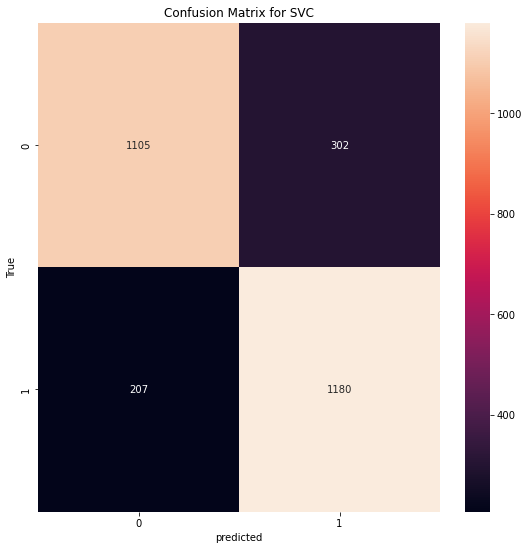

In [65]:
# For checking Confusion Matrix of above model:-
CM5=confusion_matrix(y_test, pred_sv)

x_axis_labels= ["<=50",">50"]
y_axis_labels= ["<=50",">50"]

f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(CM5,annot=True, fmt=".0f", linecolor="black")
plt.xlabel("predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for SVC")
plt.show()

# CROSS VALIDATION PHASE:-

In [66]:
# For importing required libraries:-
from sklearn.model_selection import cross_val_score

In [67]:
# For Cv score of KNN:-
print(cross_val_score(knn,x,y,cv=5).mean())

0.7840188380113149


In [68]:
# For Cv score of Gbc:-
print(cross_val_score(Gbc,x,y,cv=5).mean())

0.8316677056992688


In [69]:
# For Cv score of ExtraTrees:-
print(cross_val_score(Extra,x,y,cv=5).mean())

0.8645233175260284


In [70]:
# For Cv score of DecisionTrees:-
print(cross_val_score(DTC,x,y,cv=5).mean())

0.78682842886596


In [71]:
# For Cv score of RandomForestClassifier:-
print(cross_val_score(rfc,x,y,cv=5).mean())

0.8508993819507195


In [72]:
# For Cv score of SupportVectorClassifier:
print(cross_val_score(sv,x,y,cv=5).mean())

0.8031559973195292


So, Here the ExtraTreesClassifier is giving highest accuracy of 87.9 % with least difference between cv and acc scores. 
it is the final and best model for Hyper Parameter tuning.

# HYPER PARAMETER TUNING:-

In [83]:
# For importing required libraries:-
from sklearn.model_selection import GridSearchCV

In [84]:
parameters= {'criterion':['gini','entropy'],
             'random_state': [10,100,1000],
             'n_jobs':[-2,-1,1,2],
             'n_estimators':[100,200,300],
             'max_depth': [0,10,20]}

In [85]:
Gcv=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [86]:
Gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [100, 200, 300],
                         'n_jobs': [-2, -1, 1, 2],
                         'random_state': [10, 100, 1000]})

In [87]:
Gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 1000}

In [88]:
FinalModel=ExtraTreesClassifier(criterion='gini', max_depth=20,n_estimators=200, n_jobs=-2, random_state=1000)
FinalModel.fit(x_train,y_train)
pred=FinalModel.predict(x_test)
acc=accuracy_score(y_test, pred)

print('Accuracy Score:',(accuracy_score(y_test,pred)*100))
print('Confusion matrix:',confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score: 87.72369362920543
Confusion matrix: [[1194  213]
 [ 130 1257]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1407
           1       0.86      0.91      0.88      1387

    accuracy                           0.88      2794
   macro avg       0.88      0.88      0.88      2794
weighted avg       0.88      0.88      0.88      2794



# ROC/AUC CURVE:-

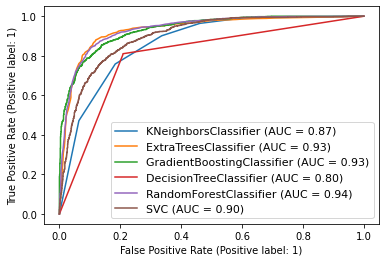

In [89]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(Extra, x_test, y_test, ax=disp.ax_)     
plot_roc_curve(Gbc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(rfc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(sv, x_test, y_test, ax=disp.ax_)
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

Here, the Actual and the Predicted values are shown above.

# Saving Model:-

In [90]:
# For importing required libraries and saving the model using pickle:-
import pickle
Name='CustomerChurn'
pickle.dump(FinalModel,open(Name,'wb'))

# Loading the Saved Model:-

In [92]:
# loading the saved model and fetching the predictions by the model:-
LoadedModel=pickle.load(open('CustomerChurn','rb'))
PredictionA=LoadedModel.predict(x_test)
print(PredictionA)

[1 0 0 ... 1 1 1]


Thanks